In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy import stats as st


from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_data_github.csv to diabetes_data_github.csv


In [3]:

df=pd.read_csv('diabetes_data_github.csv')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',None)

In [4]:
df = df.sample(frac = 1)  #Shuffle the rows

In [5]:
df.shape

(768, 9)

In [6]:
df

Pregnancies  glucose   BloodPressure  SkinThickness  Insulin   BMI  \
716            3       173             78             39      185  33.8   
435            0       141              0              0        0  42.4   
498            7       195             70             33      145  25.1   
380            1       107             72             30       82  30.8   
135            2       125             60             20      140  33.8   
570            3        78             70              0        0  32.5   
11            10       168             74              0        0  38.0   
211            0       147             85             54        0  42.8   
564            0        91             80              0        0  32.4   
738            2        99             60             17      160  36.6   
21             8        99             84              0        0  35.4   
104            2        85             65              0        0  39.6   
281           10       129             76             28      122  35.9   
128            1       117             88             24      145  34.5   
759            6       190             92              0        0  35.5   
312            2       155             74             17       96  26.6   
582           12       121             78             17        0  26.5   
450            1        82             64             13       95  21.2   
298           14       100             78             25      184  36.6   
200            0       113             80             16        0  31.0   
251            2       129             84              0        0  28.0   
209            7       184             84             33        0  35.5   
744           13       153             88             37      140  40.6   
6              3        78             50             32       88  31.0   
78             0       131              0              0        0  43.2   
56             7       187             68             39      304  37.7   
657            1       120             80             48      200  38.9   
639            1       100             74             12       46  19.5   
521            3       124             80             33      130  33.2   
725            4       112             78             40        0  39.4   
138            0       129             80              0        0  31.2   
270           10       101             86             37        0  45.6   
115            4       146             92              0        0  31.2   
628            5       128             80              0        0  34.6   
262            4        95             70             32        0  32.1   
313            3       113             50             10       85  29.5   
550            1       116             70             28        0  27.4   
15             7       100              0              0        0  30.0   
288            4        96             56             17       49  20.8   
405            2       123             48             32      165  42.1   
142            2       108             52             26       63  32.5   
353            1        90             62             12       43  27.2   
131            9       122             56              0        0  33.3   
672           10        68            106             23       49  35.5   
516            9       145             88             34      165  30.3   
753            0       181             88             44      510  43.3   
309            2       124             68             28      205  32.9   
306           10       161             68             23      132  25.5   
344            8        95             72              0        0  36.8   
293            1       128             48             45      194  40.5   
116            5       124             74              0        0  34.0   
622            6       183             94              0        0  40.8   
170            6       102    

In [7]:
df.isnull().sum()

Pregnancies                 0
glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#fillling empty values with median
df = df.fillna(df.median())
df.isna().sum()

Pregnancies                 0
glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe()

Pregnancies    glucose   BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
# copy the data
df_max_scaled = df.copy()

# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()

# view normalized data
display(df_max_scaled)

Pregnancies  glucose   BloodPressure  SkinThickness   Insulin       BMI  \
716     0.176471  0.869347       0.639344       0.393939  0.218676  0.503726   
435     0.000000  0.708543       0.000000       0.000000  0.000000  0.631893   
498     0.411765  0.979899       0.573770       0.333333  0.171395  0.374069   
380     0.058824  0.537688       0.590164       0.303030  0.096927  0.459016   
135     0.117647  0.628141       0.491803       0.202020  0.165485  0.503726   
570     0.176471  0.391960       0.573770       0.000000  0.000000  0.484352   
11      0.588235  0.844221       0.606557       0.000000  0.000000  0.566319   
211     0.000000  0.738693       0.696721       0.545455  0.000000  0.637854   
564     0.000000  0.457286       0.655738       0.000000  0.000000  0.482861   
738     0.117647  0.497487       0.491803       0.171717  0.189125  0.545455   
21      0.470588  0.497487       0.688525       0.000000  0.000000  0.527571   
104     0.117647  0.427136       0.532787       0.000000  0.000000  0.590164   
281     0.588235  0.648241       0.622951       0.282828  0.144208  0.535022   
128     0.058824  0.587940       0.721311       0.242424  0.171395  0.514158   
759     0.352941  0.954774       0.754098       0.000000  0.000000  0.529061   
312     0.117647  0.778894       0.606557       0.171717  0.113475  0.396423   
582     0.705882  0.608040       0.639344       0.171717  0.000000  0.394933   
450     0.058824  0.412060       0.524590       0.131313  0.112293  0.315946   
298     0.823529  0.502513       0.639344       0.252525  0.217494  0.545455   
200     0.000000  0.567839       0.655738       0.161616  0.000000  0.461997   
251     0.117647  0.648241       0.688525       0.000000  0.000000  0.417288   
209     0.411765  0.924623       0.688525       0.333333  0.000000  0.529061   
744     0.764706  0.768844       0.721311       0.373737  0.165485  0.605067   
6       0.176471  0.391960       0.409836       0.323232  0.104019  0.461997   
78      0.000000  0.658291       0.000000       0.000000  0.000000  0.643815   
56      0.411765  0.939698       0.557377       0.393939  0.359338  0.561848   
657     0.058824  0.603015       0.655738       0.484848  0.236407  0.579732   
639     0.058824  0.502513       0.606557       0.121212  0.054374  0.290611   
521     0.176471  0.623116       0.655738       0.333333  0.153664  0.494784   
725     0.235294  0.562814       0.639344       0.404040  0.000000  0.587183   
138     0.000000  0.648241       0.655738       0.000000  0.000000  0.464978   
270     0.588235  0.507538       0.704918       0.373737  0.000000  0.679583   
115     0.235294  0.733668       0.754098       0.000000  0.000000  0.464978   
628     0.294118  0.643216       0.655738       0.000000  0.000000  0.515648   
262     0.235294  0.477387       0.573770       0.323232  0.000000  0.478390   
313     0.176471  0.567839       0.409836       0.101010  0.100473  0.439642   
550     0.058824  0.582915       0.573770       0.282828  0.000000  0.408346   
15      0.411765  0.502513       0.000000       0.000000  0.000000  0.447094   
288     0.235294  0.482412       0.459016       0.171717  0.057920  0.309985   
405     0.117647  0.618090       0.393443       0.323232  0.195035  0.627422   
142     0.117647  0.542714       0.426230       0.262626  0.074468  0.484352   
353     0.058824  0.452261       0.508197       0.121212  0.050827  0.405365   
131     0.529412  0.613065       0.459016       0.000000  0.000000  0.496274   
672     0.588235  0.341709       0.868852       0.232323  0.057920  0.529061   
516     0.529412  0.728643       0.721311       0.343434  0.195035  0.451565   
753     0.000000  0.909548       0.721311       0.444444  0.602837  0.645306   
309     0.117647  0.623116       0.557377       0.282828  0.242317  0.490313   
306     0.588235  0.809045       0.557377       0.232323  0.156028  0.380030   
344     0.470588  0.477387       0.590164       0.000000  0.000000  0.548435   
293  

In [12]:
df=df_max_scaled

In [13]:
from imblearn.over_sampling import BorderlineSMOTE
df = df.astype('float64')

x = df.drop('Outcome', axis=1)
y = df['Outcome']




x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)






In [14]:
#Mutual Information
from sklearn.feature_selection import mutual_info_classif
#Determine mutual informatiom
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)


glucose                     0.157595
BMI                         0.087735
Age                         0.066308
Insulin                     0.046991
DiabetesPedigreeFunction    0.029512
Pregnancies                 0.028308
SkinThickness               0.016811
BloodPressure               0.004273
dtype: float64

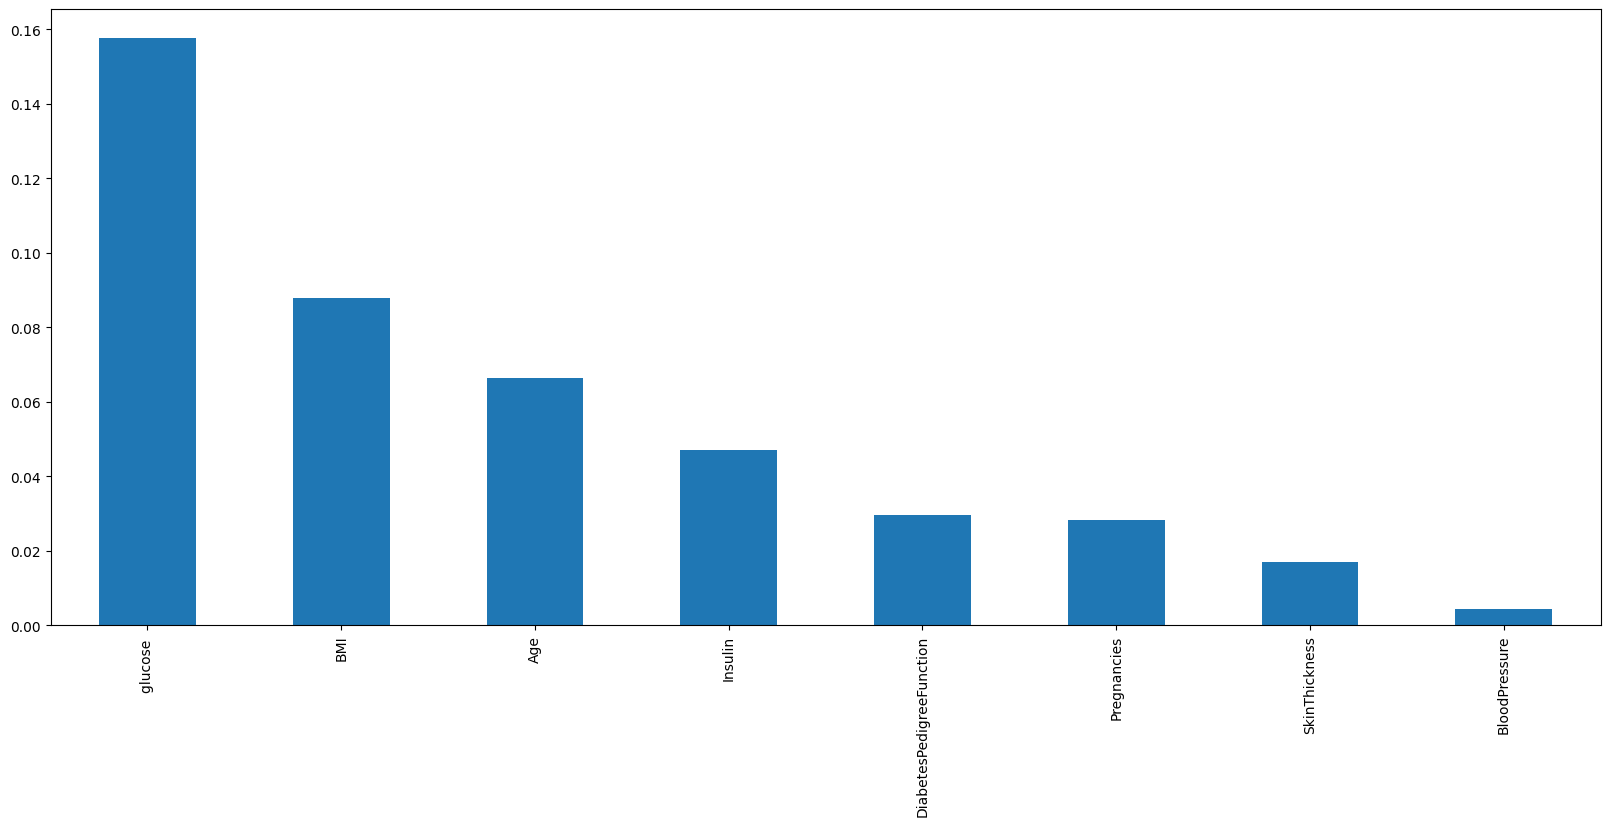

In [15]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))
plt.savefig("MutualInformation.png", dpi=600,bbox_inches = 'tight')

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()


param_grid = {
    'bootstrap': [True]
}

rfclassifier = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 5, n_jobs = -1, verbose = 2)
rfclassifier.fit(x_train, y_train)
rfclassifier.best_params_


Fitting 5 folds for each of 1 candidates, totalling 5 fits


{'bootstrap': True}

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred = rfclassifier.predict(x_test)
y_proba = rfclassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[87 11]
 [19 37]]
              precision    recall  f1-score   support

         0.0       0.82      0.89      0.85        98
         1.0       0.77      0.66      0.71        56

    accuracy                           0.81       154
   macro avg       0.80      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154





accuracy 0.81
precision 0.77
recall 0.66
AUC: 0.84
Precision-Recall: 0.78


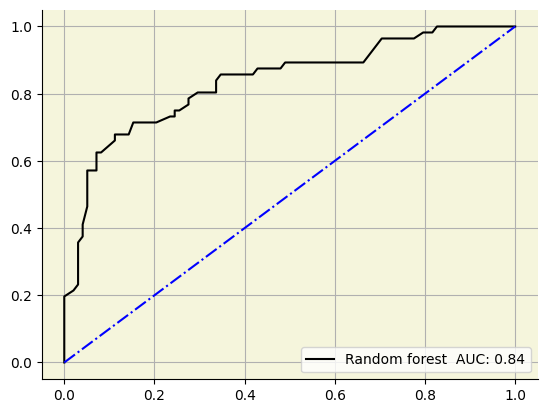

hamming loss
0.19480519480519481
jaccord score
0.5522388059701493
log loss
7.021490919957886
mathews correlation coefficient
0.5696208701928058


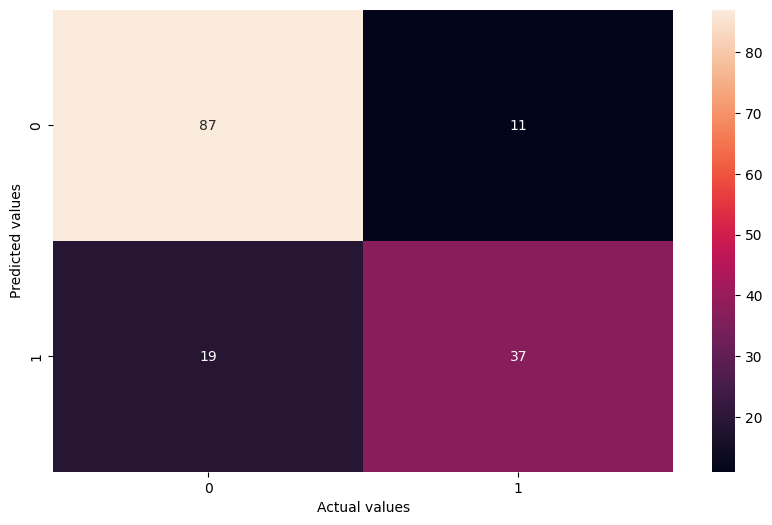

In [18]:
# RandomForest summary
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
#fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Random forest  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC RandomForest", dpi=800,bbox_inches = 'tight')

plt.show()


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Random forest", dpi=800,bbox_inches = 'tight')



print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))


In [19]:
!pip install shap
import shap
explainer = shap.Explainer(rfclassifier.predict, x_train)
shap_values = explainer(x_train)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 4.0 MB/s eta 0:00:00


ExactExplainer explainer: 615it [02:29,  3.98it/s]


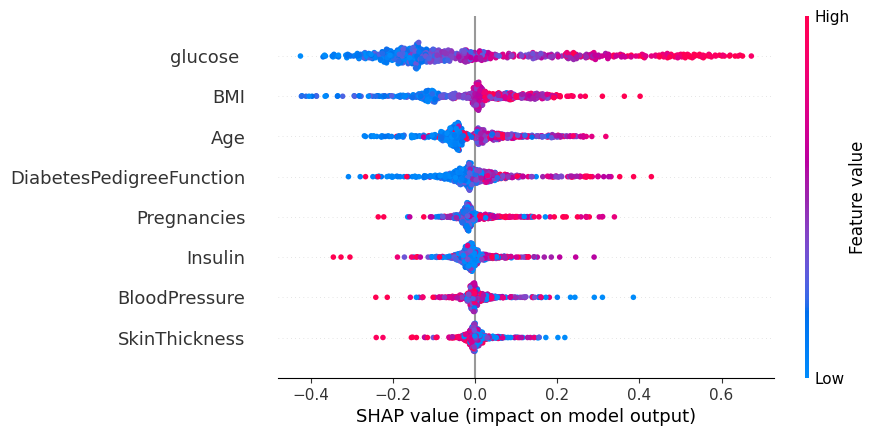

In [20]:
fig=plt.figure()
fig=shap.plots.beeswarm(shap_values, max_display=25,show=False)
plt.savefig("BeeSwarm1.png", dpi=700,bbox_inches = 'tight')
plt.show()

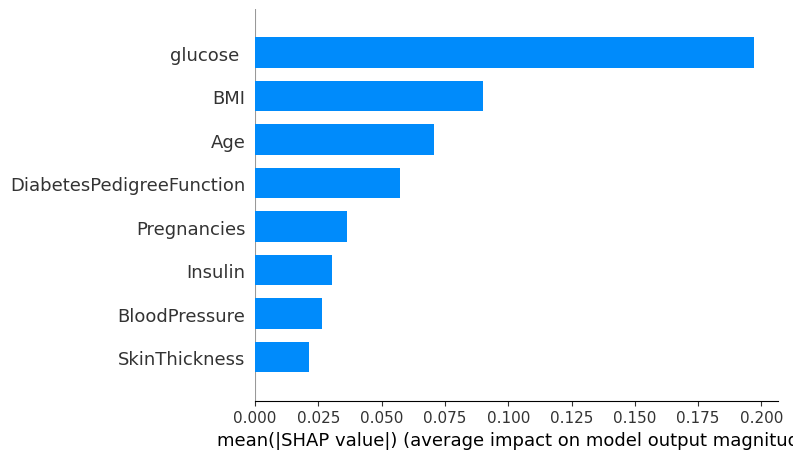

In [21]:
# Average feature contribution


fig=shap.summary_plot(shap_values, x_train, plot_type="bar",show=False)
plt.savefig("BarChartSHAP.png", dpi=100,bbox_inches = 'tight')
plt.show()

In [22]:
#Logistic Regression
# Create the parameter grid based on the results of random search
param_grid = {
    'penalty': ['l2'],
    'C': [0.001,0.01,0.1,1,10,100,1000]
}

# Create a based model
lr = LogisticRegression()
# Instantiate the grid search model
lrClassifier = GridSearchCV(estimator = lr, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

lrClassifier.fit(x_train, y_train)
lrClassifier.best_params_

Fitting 3 folds for each of 7 candidates, totalling 21 fits


{'C': 100, 'penalty': 'l2'}

[[89  9]
 [23 33]]
              precision    recall  f1-score   support

         0.0       0.79      0.91      0.85        98
         1.0       0.79      0.59      0.67        56

    accuracy                           0.79       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.79      0.79      0.78       154

hamming loss
0.2077922077922078
jaccord score
0.5076923076923077
log loss
7.489590314621746
mathews correlation coefficient
0.5373063079037129


accuracy 0.79
precision 0.79
recall 0.59
AUC: 0.85
Precision-Recall: 0.81


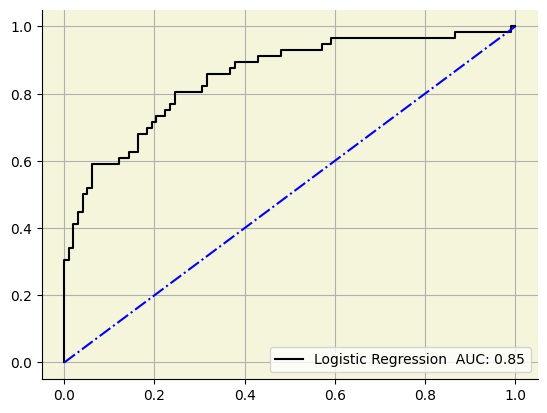

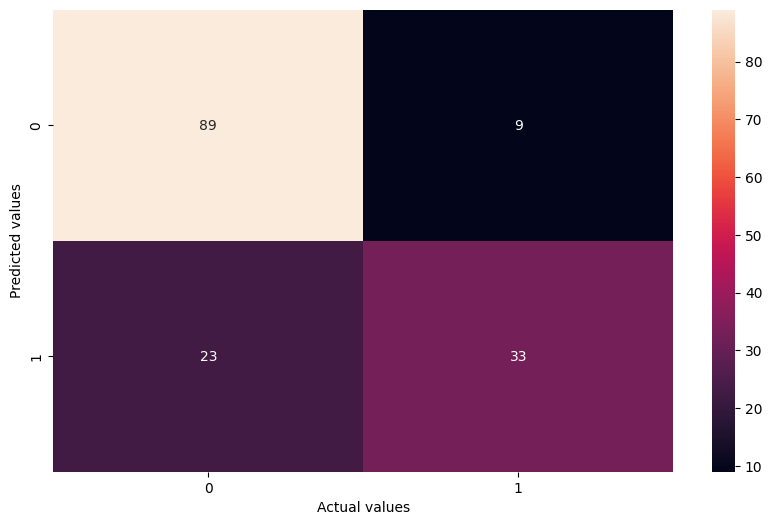

In [23]:
y_pred = lrClassifier.predict(x_test)
y_proba = lrClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))

# RandomForest summary
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
#fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Logistic Regression  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC LR", dpi=800,bbox_inches = 'tight')

plt.show()







#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matrix Logistic regression", dpi=800,bbox_inches = 'tight')


In [24]:
classifier_dtc = DecisionTreeClassifier()
classifier_dtc.fit(x_train,y_train)
y_pred=classifier_dtc.predict(x_test)

In [25]:
#ELI5
!pip install eli5
import eli5 as eli
eli.explain_weights(classifier_dtc)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107720 sha256=6dc7781240c04ddb06c0de0918ae0217b7156d0f008611970930e1446778ed4b
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


Explanation(estimator='DecisionTreeClassifier()', description='\nDecision tree feature importances; values are numbers 0 <= x <= 1;\nall values sum to 1.\n', error=None, method='decision tree', is_regression=False, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='x1', weight=0.2824457775349018, std=None, value=None), FeatureWeight(feature='x7', weight=0.1521074790399133, std=None, value=None), FeatureWeight(feature='x6', weight=0.1475933832150422, std=None, value=None), FeatureWeight(feature='x5', weight=0.10466819545803281, std=None, value=None), FeatureWeight(feature='x2', weight=0.09867073236952204, std=None, value=None), FeatureWeight(feature='x0', weight=0.09592541551021554, std=None, value=None), FeatureWeight(feature='x4', weight=0.0639189999654814, std=None, value=None), FeatureWeight(feature='x3', weight=0.05467001690689092, std=None, value=None)], remaining=0), decision_tree=TreeInfo(criterion='gini', tree=NodeInfo(id=0, is_leaf=False, value=[402.0, 212.0], value_ratio=[0.6547231270358306, 0.34527687296416937], impurity=0.4521215079205084, samples=614, sample_ratio=1.0, feature_name='x1', feature_id=1, threshold=0.7211055159568787, left=NodeInfo(id=1, is_leaf=False, value=[359.0, 108.0], value_ratio=[0.7687366167023555, 0.23126338329764454], impurity=0.3555612616867425, samples=467, sample_ratio=0.760586319218241, feature_name='x5', feature_id=5, threshold=0.3926974684000015, left=NodeInfo(id=2, is_leaf=False, value=[121.0, 3.0], value_ratio=[0.9758064516129032, 0.024193548387096774], impurity=0.04721644120707591, samples=124, sample_ratio=0.20195439739413681, feature_name='x5', feature_id=5, threshold=0.13561847805976868, left=NodeInfo(id=3, is_leaf=False, value=[8.0, 2.0], value_ratio=[0.8, 0.2], impurity=0.31999999999999995, samples=10, sample_ratio=0.016286644951140065, feature_name='x0', feature_id=0, threshold=0.44117647409439087, left=NodeInfo(id=4, is_leaf=True, value=[8.0, 0.0], value_ratio=[1.0, 0.0], impurity=0.0, samples=8, sample_ratio=0.013029315960912053, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=5, is_leaf=True, value=[0.0, 2.0], value_ratio=[0.0, 1.0], impurity=0.0, samples=2, sample_ratio=0.003257328990228013, feature_name=None, feature_id=None, threshold=None, left=None, right=None)), right=NodeInfo(id=6, is_leaf=False, value=[113.0, 1.0], value_ratio=[0.9912280701754386, 0.008771929824561403], impurity=0.017389966143428692, samples=114, sample_ratio=0.18566775244299674, feature_name='x6', feature_id=6, threshold=0.2791322320699692, left=NodeInfo(id=7, is_leaf=True, value=[93.0, 0.0], value_ratio=[1.0, 0.0], impurity=0.0, samples=93, sample_ratio=0.15146579804560262, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=8, is_leaf=False, value=[20.0, 1.0], value_ratio=[0.9523809523809523, 0.047619047619047616], impurity=0.09070294784580502, samples=21, sample_ratio=0.03420195439739414, feature_name='x6', feature_id=6, threshold=0.28450413048267365, left=NodeInfo(id=9, is_leaf=True, value=[0.0, 1.0], value_ratio=[0.0, 1.0], impurity=0.0, samples=1, sample_ratio=0.0016286644951140066, feature_name=None, feature_id=None, threshold=None, left=None, right=None), right=NodeInfo(id=10, is_leaf=True, value=[20.0, 0.0], value_ratio=[1.0, 0.0], impurity=0.0, samples=20, sample_ratio=0.03257328990228013, feature_name=None, feature_id=None, threshold=None, left=None, right=None)))), right=NodeInfo(id=11, is_leaf=False, value=[238.0, 105.0], value_ratio=[0.6938775510204082, 0.30612244897959184], impurity=0.4248229904206581, samples=343, sample_ratio=0.5586319218241043, feature_name='x1', feature_id=1, threshold=0.5050251185894012, left=NodeInfo(id=12, is_leaf=False, value=[105.0, 15.0], value_ratio=[0.875, 0.125], impurity=0.21875, samples=120, sample_ratio=0.19543973941368079, feature_name='x6', feature_id=6, threshold=0.274380162358284, left=NodeInfo(id=13, is_leaf=False, value=[

In [26]:
eli.explain_prediction(classifier_dtc , np.array(x_test)[1])

Explanation(estimator='DecisionTreeClassifier()', description='\nFeatures with largest coefficients.\n\nFeature weights are calculated by following decision paths in trees\nof an ensemble (or a single tree for DecisionTreeClassifier).\nEach node of the tree has an output score, and contribution of a feature\non the decision path is how much the score changes from parent to child.\nWeights of all features sum to the output score or proba of the estimator.\n\nCaveats:\n1. Feature weights just show if the feature contributed positively or\n   negatively to the final score, and does not show how increasing or\n   decreasing the feature value will change the prediction.\n2. In some cases, feature weight can be close to zero for an important feature.\n   For example, in a single tree that computes XOR function, the feature at the\n   top of the tree will have zero weight because expected scores for both\n   branches are equal, so decision at the top feature does not change the\n   expected score. For an ensemble predicting XOR functions it might not be\n   a problem, but it is not reliable if most trees happen to choose the same\n   feature at the top.\n', error=None, method='decision path', is_regression=False, targets=[TargetExplanation(target=0.0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='<BIAS>', weight=0.6547231270358306, std=None, value=1.0), FeatureWeight(feature='x1', weight=0.32961869726680637, std=None, value=0.45226130653266333), FeatureWeight(feature='x6', weight=0.04500000000000004, std=None, value=0.20785123966942148), FeatureWeight(feature='x7', weight=0.034545454545454546, std=None, value=0.3333333333333333)], neg=[FeatureWeight(feature='x5', weight=-0.06388727884809153, std=None, value=0.5692995529061103)], pos_remaining=0, neg_remaining=0), proba=1.0, score=None, weighted_spans=None, heatmap=None)], feature_importances=None, decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [27]:
eli.show_prediction(classifier_dtc, x_test.iloc[1],
                    feature_names=list(x_train.columns),
                    show_feature_values=True)

In [28]:
#Decision Tree
param_grid = {
    'criterion' : ['gini', 'entropy'],
}

# Create a based model
dt = DecisionTreeClassifier()
# Instantiate the grid search model
dtClassifier = GridSearchCV(estimator = dt, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

dtClassifier.fit(x_train, y_train)
dtClassifier.best_params_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


{'criterion': 'entropy'}

[[74 24]
 [21 35]]
              precision    recall  f1-score   support

         0.0       0.78      0.76      0.77        98
         1.0       0.59      0.62      0.61        56

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154

hamming loss
0.2922077922077922
jaccord score
0.4375
log loss
10.53223637993683
mathews correlation coefficient
0.37611395229402644


accuracy 0.71
precision 0.59
recall 0.62
AUC: 0.69
Precision-Recall: 0.51


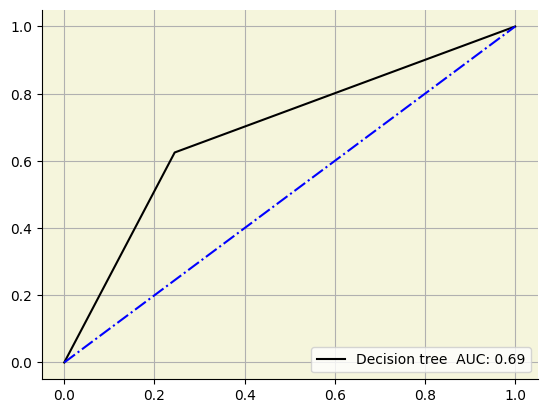

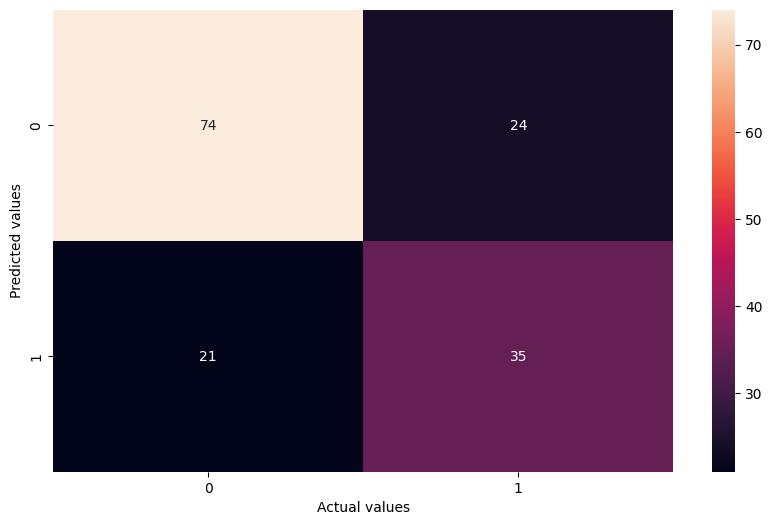

In [29]:
y_pred = dtClassifier.predict(x_test)
y_proba = dtClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))

print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
#fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Decision tree  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Decision Tree", dpi=800,bbox_inches = 'tight')

plt.show()


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Decision Tree", dpi=800,bbox_inches = 'tight')


In [30]:
# Create a based model
knn = KNeighborsClassifier(algorithm = 'brute')

k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid search model
knnClassifier = GridSearchCV(estimator = knn, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

knnClassifier.fit(x_train, y_train)
knnClassifier.best_params_


Fitting 3 folds for each of 99 candidates, totalling 297 fits


{'n_neighbors': 29}

[[94  4]
 [28 28]]
              precision    recall  f1-score   support

         0.0       0.77      0.96      0.85        98
         1.0       0.88      0.50      0.64        56

    accuracy                           0.79       154
   macro avg       0.82      0.73      0.75       154
weighted avg       0.81      0.79      0.78       154

hamming loss
0.2077922077922078
jaccord score
0.4666666666666667
log loss
7.489590314621746
mathews correlation coefficient
0.5444256583078058


accuracy 0.79
precision 0.88
recall 0.5
AUC: 0.83
Precision-Recall: 0.79


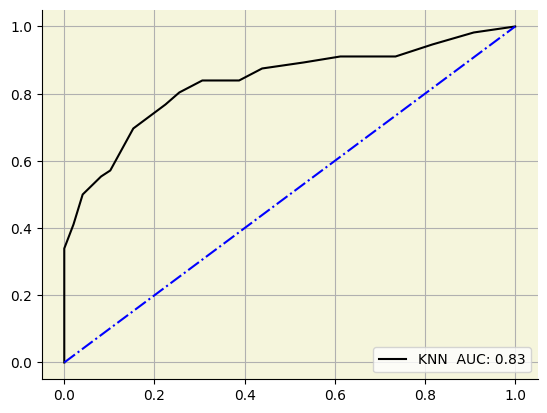

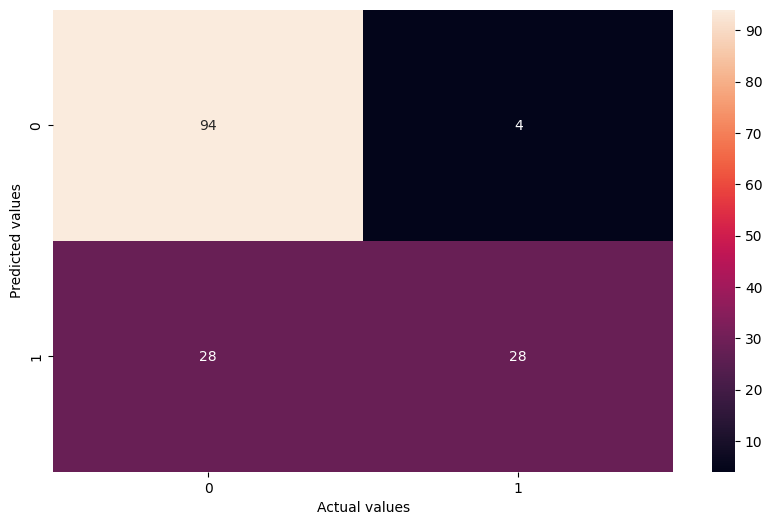

In [31]:
y_pred = knnClassifier.predict(x_test)
y_proba = knnClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
#fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='KNN  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC KNN", dpi=800,bbox_inches = 'tight')

plt.show()


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix KNN", dpi=800,bbox_inches = 'tight')



In [32]:
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.0001, 0.001]
}

# Create a based model
ad = AdaBoostClassifier()
# Instantiate the grid search model
grid_searchAdaBoostClassifier = GridSearchCV(estimator = ad, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

grid_searchAdaBoostClassifier.fit(x_train, y_train)
grid_searchAdaBoostClassifier.best_params_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


{'learning_rate': 0.0001, 'n_estimators': 100}

[[91  7]
 [34 22]]
              precision    recall  f1-score   support

         0.0       0.73      0.93      0.82        98
         1.0       0.76      0.39      0.52        56

    accuracy                           0.73       154
   macro avg       0.74      0.66      0.67       154
weighted avg       0.74      0.73      0.71       154

hamming loss
0.2662337662337662
jaccord score
0.3492063492063492
log loss
9.596037590609113
mathews correlation coefficient
0.39549183696183704


accuracy 0.73
precision 0.76
recall 0.39
AUC: 0.66
Precision-Recall: 0.52


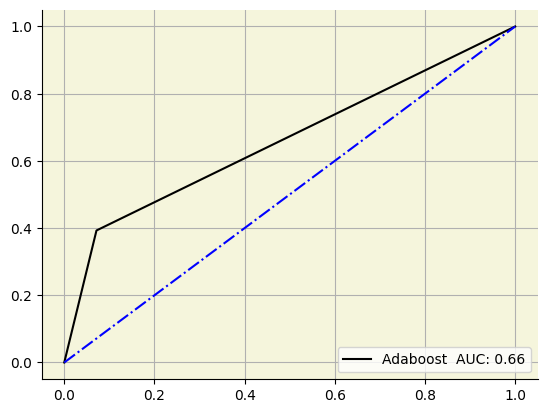

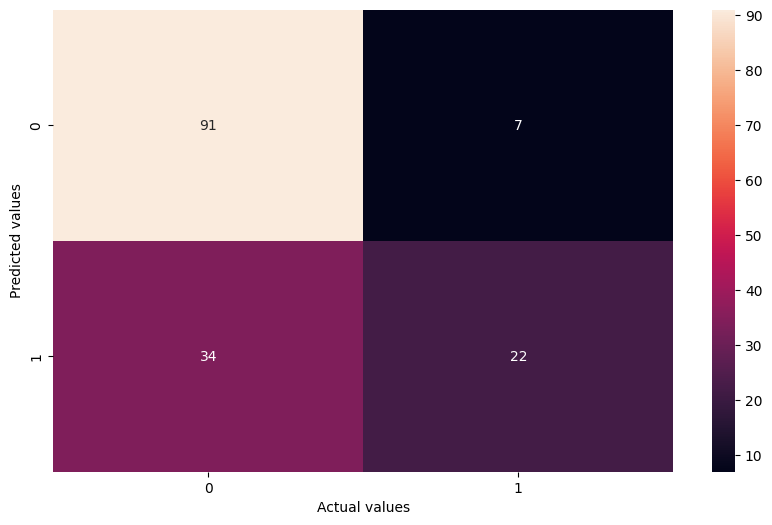

In [33]:
y_pred = grid_searchAdaBoostClassifier.predict(x_test)
y_proba = grid_searchAdaBoostClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))

# ExtratreeClassifier summary
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
#fig.suptitle('(c)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Adaboost  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Adaboost", dpi=800,bbox_inches = 'tight')

plt.show()



#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Adaboost", dpi=800,bbox_inches = 'tight')


In [34]:
!pip install lime
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=x_train.columns,
    mode='classification'
)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=18cb4af1cbe971b7a263d983d2108c09319e45b2f42dd931083653488be2d55c
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


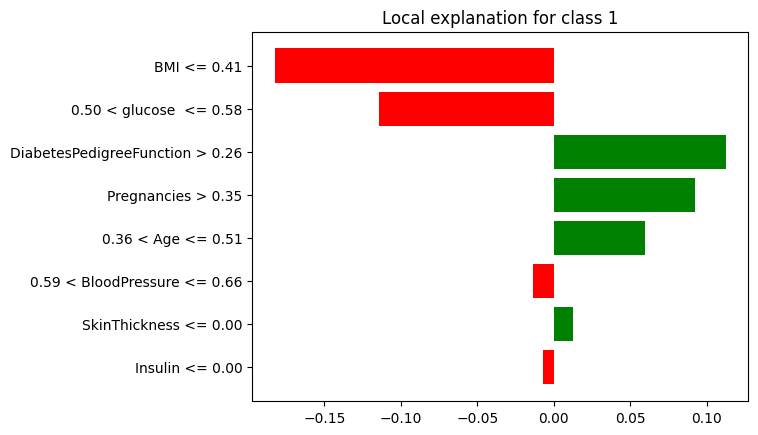

In [35]:
exp = interpretor.explain_instance(
    data_row=x_test.iloc[12], ##new data
    predict_fn=rfclassifier.predict_proba
)
exp.save_to_file('LIME1.html')

fig = exp.as_pyplot_figure()
fig.savefig('lime_report.png')

fig=exp.show_in_notebook(show_table=True)
plt.savefig("LIMESurvived.png", dpi=100,bbox_inches = 'tight')
plt.show()

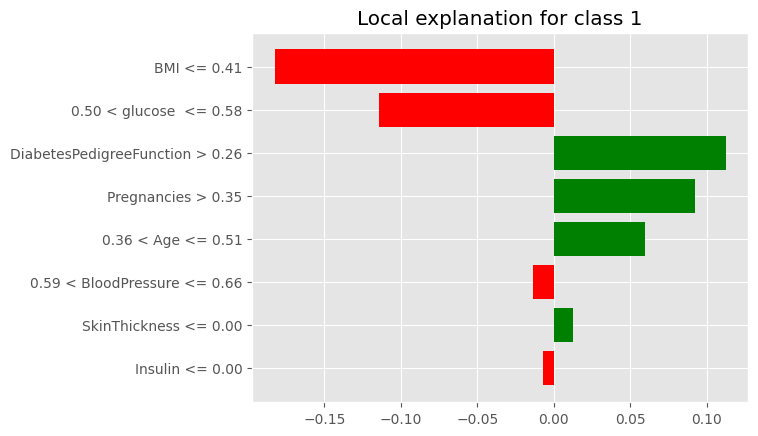

In [36]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()

    plt.savefig("LIME1.png", dpi=600,bbox_inches = 'tight')

In [37]:
exp = interpretor.explain_instance(
    data_row=x_test.iloc[25], ##new data
    predict_fn=rfclassifier.predict_proba
)

fig=exp.show_in_notebook(show_table=True)

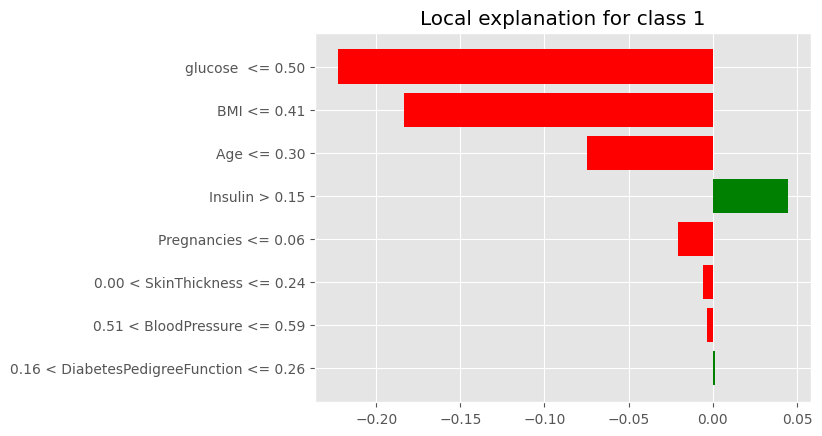

In [38]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()
    plt.savefig("LIME2.png", dpi=600,bbox_inches = 'tight')